# Творче завдання

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


In [160]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
df = pd.read_csv('../data/yulu_rental.csv')

In [26]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**1. Як різні типи користувачів використовують сервіс, залежно від часу?**

In [29]:
df.datetime = pd.to_datetime(df.datetime)
df['time'] = df.datetime.dt.time

In [31]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,01:00:00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,02:00:00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,03:00:00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,04:00:00


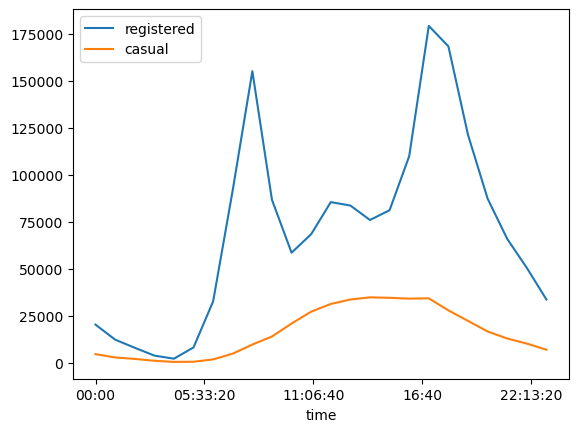

In [145]:
df['time'] = pd.to_datetime(df['datetime'], format='%H').dt.time
df_time = df[['time', 'registered', 'casual']].groupby('time').sum()
df_time.plot()
plt.show();

1. На лінійному графіку ми бачимо, що звичайні користувачі не використовують сервіс в нічний час і починають свої поїздки з 05:33. Це можна легко пояснити тим, що зазвичай у ранковий час люди доїжджають на роботу і тому можуть користуватися орендою велосипедів. Піковий час використання сервісу для цієї групи: від 11-ї до 17-ї години. Це досить нетипові години, можливо це більш актуально для вихідних днів.
2. Натомість зареєстровані користувачі мають більший розкид по годинах: найнижче значення перед світанком (орієнтовно 4-та година), далі пікові години - ранкові і вечірні, коли люди спочатку доїжджають на роботу, а потім додому.
   
**Отже, нам варто було би попрацювати із зареєстрованими користувачами протягом робочого дня та увечері, можливо дарувати якісь знижки на оренду велосипеда до 11 год або після 18 год. Також спробувати залучити більше звичайних коритувачів до ресєтрації, щоб ефективніше працювати з цією групою**

Точки на осі х потрібно було б відформатувати до значення лише годин, проте мені це поки не вдалося. Попрацюю над цим ще пізніше.

**2.Чи є залежність між кількістю користувачів за двома групами і швидкістю вітру?**

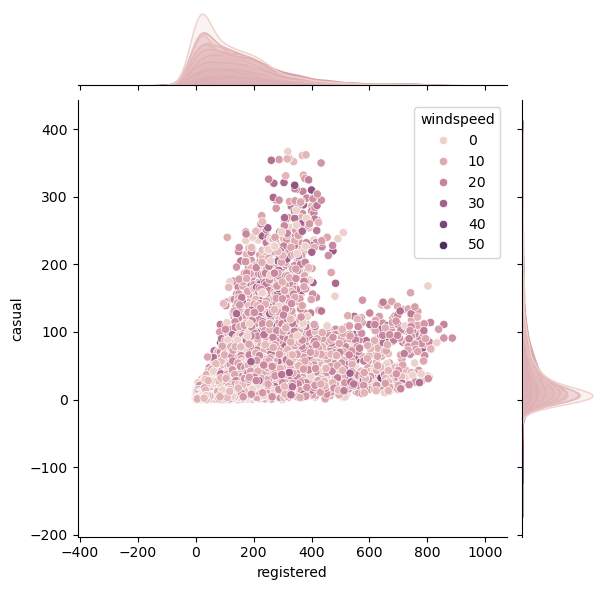

In [194]:
sns.jointplot(data=df, x='registered', y='casual', hue='windspeed')
plt.show();     

1. На графіку бачимо, що є залежність між збільшенням кількості зареєстрованих та звичайних користувачів, обидві групи зростають.
2. Здається, що швидкість вітру орієнтовно до 40-ка ніяк не впливає на кількість зареєстрованих і звичайних користувачів, адже дані ріних кольорів присутні уздовж майже усієї осі Ох та осі Оу. Проте від 40-ка і до 50-ти ми маємо дуже незначну кількість точок даних, що свідчить про те, що за таких погодніх умов сервісом практично не користуються. Найбільша кількість точок відповідають за швидкість вітру від 0 до 30-ти для обох груп користувачів.опадами.

**3.Чи змінюється загальна кількість користувачів, залежно від дня тижня?**

In [202]:
df['dayofweek'] = df.datetime.dt.day_of_week

In [257]:
groupby_dayofweek = pd.DataFrame(df.groupby('dayofweek')['count'].sum())

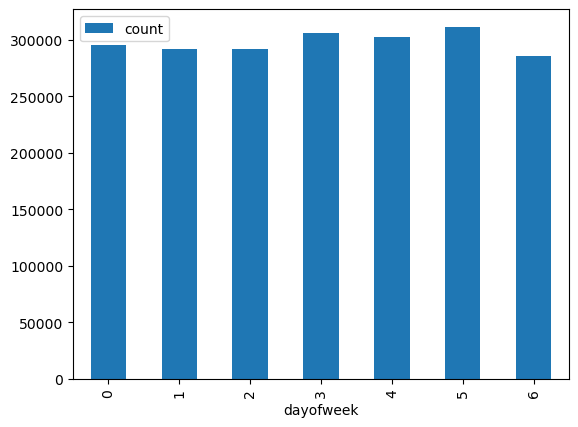

In [261]:
groupby_dayofweek.plot.bar()
plt.show()

З наведеної вище гістограми можемо зробити висновок, що день тижня практично не впливає на загальну кількість користувачів сервісу (маємо трохи менші показники у середу та неділю). Загалом, це добре, адже протягом тижня ми можемо очікувати на однаковий прибуток. Проте можна працювати над збільшенням загальної кількості оренд велосипедів, а також можливо стимулювати зростання кількості оренд у середу та неділю промоакціями. 
Щоб детальніше це дослідити, пропоную розглянути цей показник у розрізі груп користувачів.

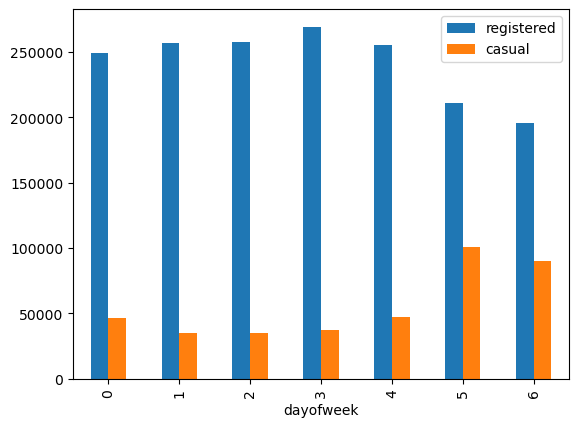

In [273]:
groupby_dayofweek1 = pd.DataFrame(df.groupby('dayofweek')[['registered', 'casual']].sum())
groupby_dayofweek1.plot.bar()
plt.show()

1. А тут ми вже бачимо зовсім іншу ситуацію: зареєстровані користувачі користуються сервісом рівномірно протягом усього робочого тижня, проте менше орендують велосипеди на вихідних.
2. Натомість звичайні користувачі мало користуються орендою протягом тижня, проте збільшуються використання сервісу на вихідні.
   
**Це досить цікаві спостереження, які можна використати при плануванні маркетингових стратегій.**